<a href="https://colab.research.google.com/github/Vignesh424/Palmer-Penguins-Random-Forest/blob/main/Palmer_Penguins_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import seaborn as sns

In [271]:
#load dataset
penguins = sns.load_dataset("penguins")

In [272]:
#shape
penguins.shape

(344, 7)

In [273]:
#describe
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [274]:
#info
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# **EDA**

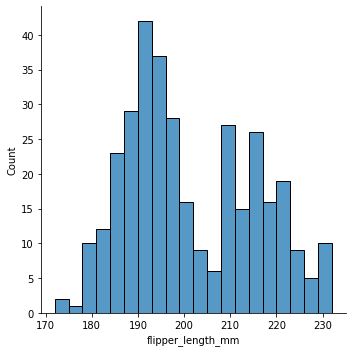

In [275]:
#displot
sns.displot(penguins, x="flipper_length_mm",binwidth=3)

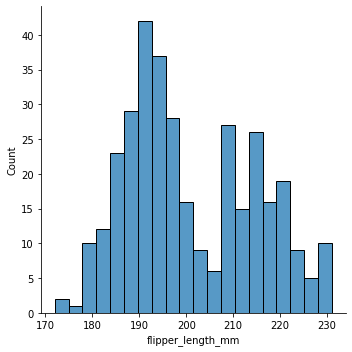

In [276]:
#bin size
sns.displot(penguins, x="flipper_length_mm", bins=20)

# **Conditioning on other variables**

Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. For example, what accounts for the bimodal distribution of flipper lengths that we saw above? displot() and histplot() provide support for conditional subsetting via the hue semantic. Assigning a variable to hue will draw a separate histogram for each of its unique values and distinguish them by color:

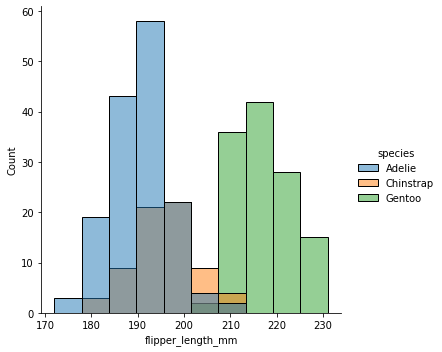

In [277]:
#species classification
sns.displot(penguins, x="flipper_length_mm", hue="species")

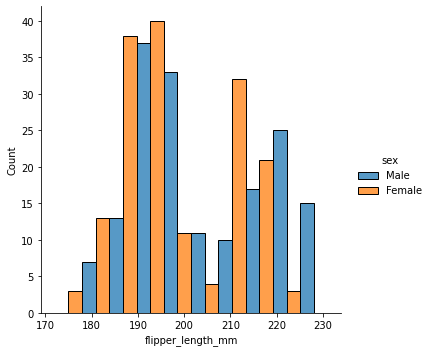

In [278]:
#sex classification 
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

It is also possible to draw each individual distribution in a separate subplot by assigning the second variable to col or row rather than (or in addition to) hue. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons:

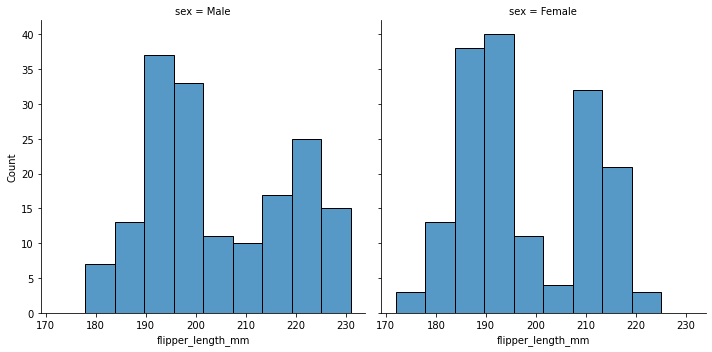

In [279]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

# **Kernel density estimation**

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate

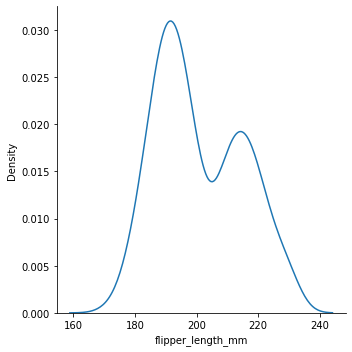

In [280]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

As with histograms, if you assign a hue variable, a separate density estimate will be computed for each level of that variable:

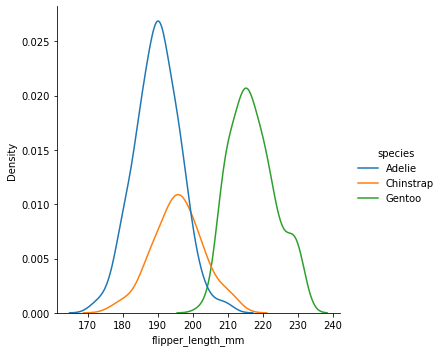

In [281]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

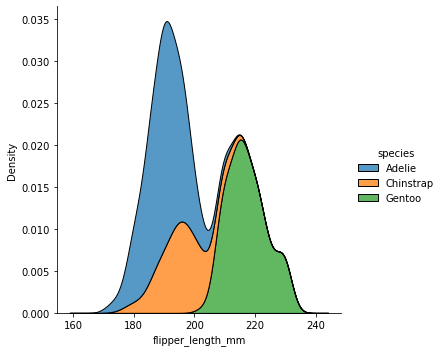

In [282]:
#kde stacked area chart
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

# **Visualizing bivariate distributions**

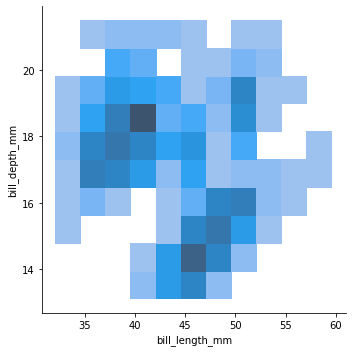

In [283]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analagous to a heatmap()). Similarly, a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian. The default representation then shows the contours of the 2D density:

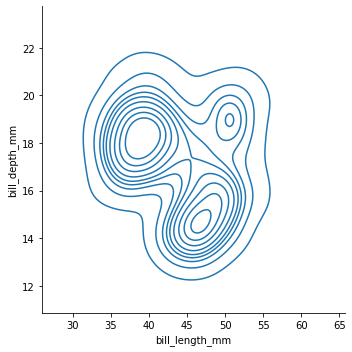

In [284]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

Assigning a hue variable will plot multiple heatmaps or contour sets using different colors. For bivariate histograms, this will only work well if there is minimal overlap between the conditional distributions:

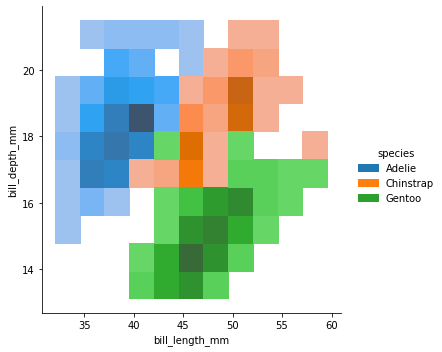

In [285]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

The contour approach of the bivariate KDE plot lends itself better to evaluating overlap, although a plot with too many contours can get busy:

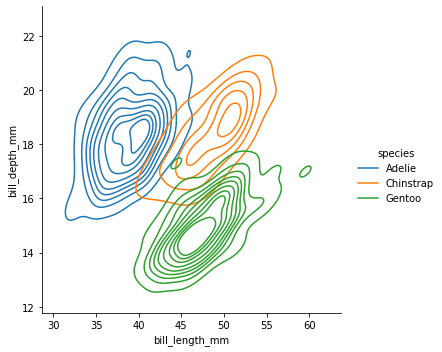

In [286]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

And the axes-level rugplot() function can be used to add rugs on the side of any other kind of plot:

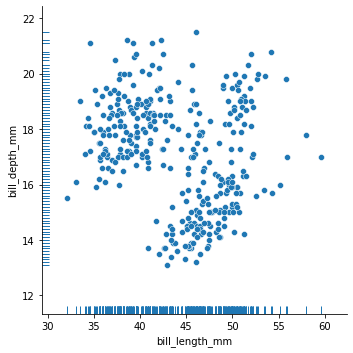

In [287]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

A less-obtrusive way to show marginal distributions uses a “rug” plot, which adds a small tick on the edge of the plot to represent each individual observation. This is built into displot():

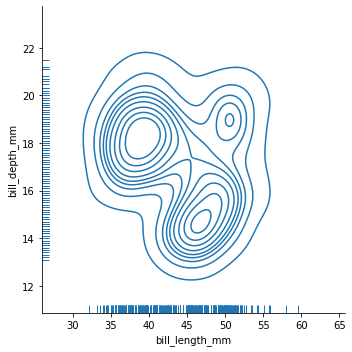

In [288]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

jointplot() is a convenient interface to the JointGrid class, which offeres more flexibility when used directly:

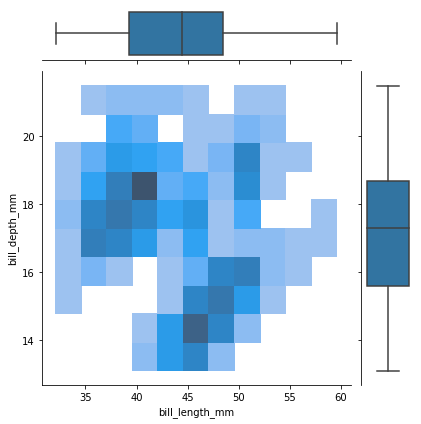

In [289]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

# **Plotting joint and marginal distributions**

The first is jointplot(), which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot():

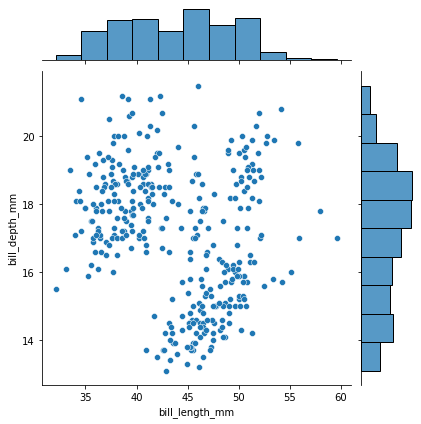

In [290]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Similar to displot(), setting a different kind="kde" in jointplot() will change both the joint and marginal plots the use kdeplot():

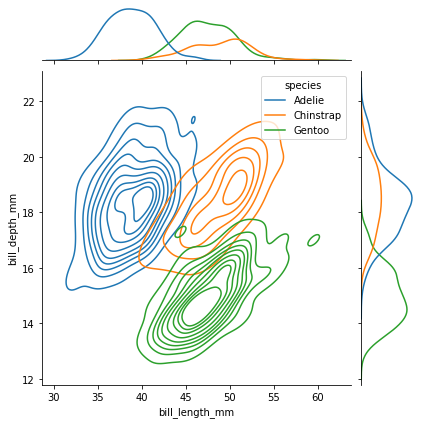

In [291]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

# **Plotting many distributions**
The pairplot() function offers a similar blend of joint and marginal distributions. Rather than focusing on a single relationship, however, pairplot() uses a “small-multiple” approach to visualize the univariate distribution of all variables in a dataset along with all of their pairwise relationships:

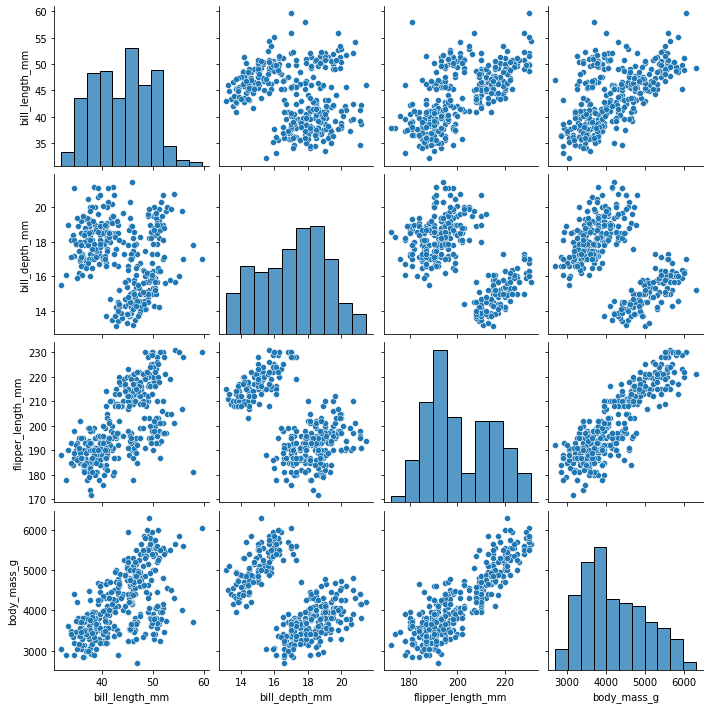

In [292]:
sns.pairplot(penguins)

As with jointplot()/JointGrid, using the underlying PairGrid directly will afford more flexibility with only a bit more typing:

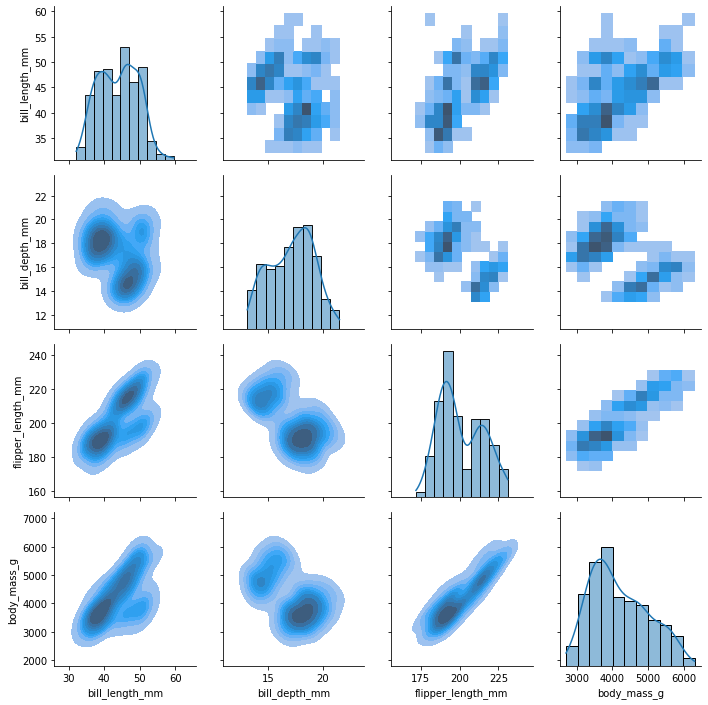

In [293]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [294]:
#load dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [295]:
#We need to drop Nan
penguins.dropna(inplace=True)

In [296]:
#load dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [297]:
# Data Preprocessing will be done using
X = penguins.iloc[:,2:6].values
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [298]:
y = penguins.iloc[:,0].values
y

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

In [299]:
# Next, we will divide the data into train and test split. 
# The following code will split the dataset into 70% training data and 30% of testing data −

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [300]:
X_train.shape

(233, 4)

In [301]:
X_test.shape

(100, 4)

In [302]:
y_train.shape

(233,)

In [303]:
y_test.shape

(100,)

In [304]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [305]:
y_pred = classifier.predict(X_test)

In [306]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[49  0  0]
 [ 0 20  0]
 [ 0  1 30]]


In [307]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        49
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      0.97      0.98        31

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [308]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.99
